# Visualization

The purpose of this notebook is to provide a simple way to visualize the results of the analysis.

In [1]:
import matplotlib.pyplot as plt
import csv
import scipy.stats as stats


In [2]:
scenariosToImport = [1, 2, 3, 4, 5, 6, 7]
casesToImport = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

scenariosToImport = [i - 1 for i in scenariosToImport]
casesToImport = [i - 1 for i in casesToImport]

timeLength = 70024

timeVector = []
for i in range(timeLength):
    timeVector.append(i / 3600)

orbitVector = []
orbitPeriod = 96 * 60
for i in range(timeLength):
    orbitVector.append(i / orbitPeriod)


In [3]:
raw = []

for scenario in scenariosToImport:
    raw.append([])
    for case in casesToImport:
        fileName = (
            "../../matlab_framework/sim/sim"
            + str(scenario + 1)
            + "_case"
            + str(case + 1)
            + ".txt"
        )
        f = open(fileName, "r")
        raw[scenario].append(f.read())
        f.close()
        raw[scenario][case] = raw[scenario][case].split("\n")
        raw[scenario][case] = raw[scenario][case][2:]
        for i in range(len(raw[scenario][case])):
            raw[scenario][case][i] = raw[scenario][case][i].split(",")
            raw[scenario][case][i] = raw[scenario][case][i][:-1]
            for j in range(len(raw[scenario][case][i])):
                raw[scenario][case][i][j] = float(raw[scenario][case][i][j])


In [4]:
casesToPlot = [11]
scenariosToPlot = [1, 2, 3, 5, 6, 7]

casesToPlot = [i - 1 for i in casesToPlot]

scenariosToPlot = [[i, scenariosToPlot[i] - 1] for i in range(len(scenariosToPlot))]

# different colors for different scenarios
colors = [
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown",
    "tab:pink",
]
# different line styles for different scenarios
lineStyles = ["-", "-", "-", "-", "-", "-", "-"]

scnearioNames = [
    # "Heater as task",
    "Linear + M",
    "Exponential + M",
    "Sigmoid + M",
    "Heater as task + excedent",
    "Linear",
    "ERT",
    "ERT + NTCT",
]


In [5]:
for i, scenario in scenariosToPlot:
    for case in casesToPlot:
        PLoad = len(raw[scenario][case]) - 4
        Ph = len(raw[scenario][case]) - 3
        W = len(raw[scenario][case]) - 2
        for t in range(1, len(timeVector)):
            if t > 3:
                if scenario + 1 == 4:
                    if round(raw[scenario][case][W][t - 1] * 1000) != round(
                        (raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t])
                        * 1000
                    ):
                        print(
                            round(raw[scenario][case][W][t - 1] * 1000),
                            round(
                                (
                                    raw[scenario][case][PLoad][t]
                                    + raw[scenario][case][Ph][t]
                                )
                                * 1000
                            ),
                            scenario + 1,
                            case + 1,
                            t,
                        )
                else:
                    if round(raw[scenario][case][W][t - 1] * 1000) < round(
                        (raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t])
                        * 1000
                    ):
                        print(
                            round(raw[scenario][case][W][t - 1] * 1000),
                            round(
                                (
                                    raw[scenario][case][PLoad][t]
                                    + raw[scenario][case][Ph][t]
                                )
                                * 1000
                            ),
                            scenario + 1,
                            case + 1,
                            t,
                        )


In [6]:
n_of_deadlines = []

for i in range(1, 12):
    # import tasks from csv
    with open("tasks/tasks" + str(i) + ".csv", newline="") as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        tasks_periods = []
        tasks_weights = []
        tasks_times = []
        x = 0
        # skip first row
        next(reader)
        for row in reader:
            tasks_periods.append(int(row[0]))
            tasks_weights.append(int(row[1]))
            tasks_times.append(int(row[2]))
            x += int(timeLength / int(row[0]))
        n_of_deadlines.append(x)
print(n_of_deadlines)


[5242, 4327, 4412, 4194, 5122, 5124, 4544, 4352, 4299, 3990, 201427]


In [7]:
from math import sqrt
Pmppt = 0
PspTotal = 1
for case in casesToPlot:
    print("case " + str(case + 1))
    for _, scenario in scenariosToPlot:
        raw_Pmppt = []
        raw_PspTotal = []
        for t in range(len(raw[scenario][case][Pmppt])):
            if (
                raw[scenario][case][Pmppt][t] > 0
                and raw[scenario][case][PspTotal][t] > 0
            ):
                raw_Pmppt.append(raw[scenario][case][Pmppt][t])
                raw_PspTotal.append(raw[scenario][case][PspTotal][t])
        r, _ = stats.pearsonr(raw_Pmppt, raw_PspTotal)
        ed = sqrt(sum([((raw[scenario][case][PspTotal][t] - raw[scenario][case][Pmppt][t]) ** 2) for t in range(timeLength)]))
        print("ed: " + str(ed))
        print("r: " + str(round(r, 5)))


case 11
ed: 83.7457803000797
r: 0.88339
ed: 54.71573000278743
r: 0.91563
ed: 86.73208342476217
r: 0.90174
ed: 45.678716619123115
r: 0.94909
ed: 70.05156599112355
r: 0.89424
ed: 86.71601195309769
r: 0.82799


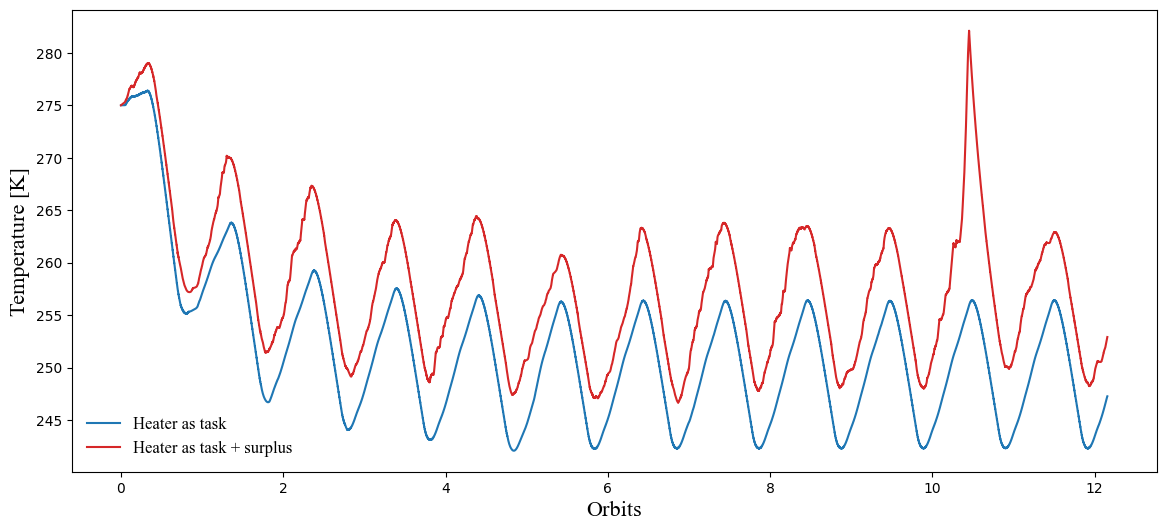

In [9]:
import matplotlib.font_manager as font_manager
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["figure.figsize"] = (14, 6)

case = 10
scenario = 0

TBat = len(raw[scenario][case]) - 1

# plt.figure(figsize=(5, 3))
plt.plot(orbitVector, raw[scenario][case][TBat], color=colors[scenario], label="Heater as task")
scenario = 3
plt.plot(orbitVector, raw[scenario][case][TBat], color=colors[scenario], label="Heater as task + surplus")
plt.xlabel("Orbits", fontdict={"size": 16, "fontname": "Times New Roman"})
plt.ylabel("Temperature [K]", fontdict={"size": 16, "fontname": "Times New Roman"})

font = font_manager.FontProperties(family='Times New Roman',
                                   style='normal',
                                   size=12)
plt.legend(frameon=False, prop=font)
# plt.show()
plt.savefig("plots/task_vs_exc.pdf", bbox_inches = 'tight')


r: 0.9934776102220184
44526
r: 0.8833917404263508
ed: 83.7457803000797
r: 0.9986056499336273
44526
r: 0.9713871670849076
ed: 27.647593889169784


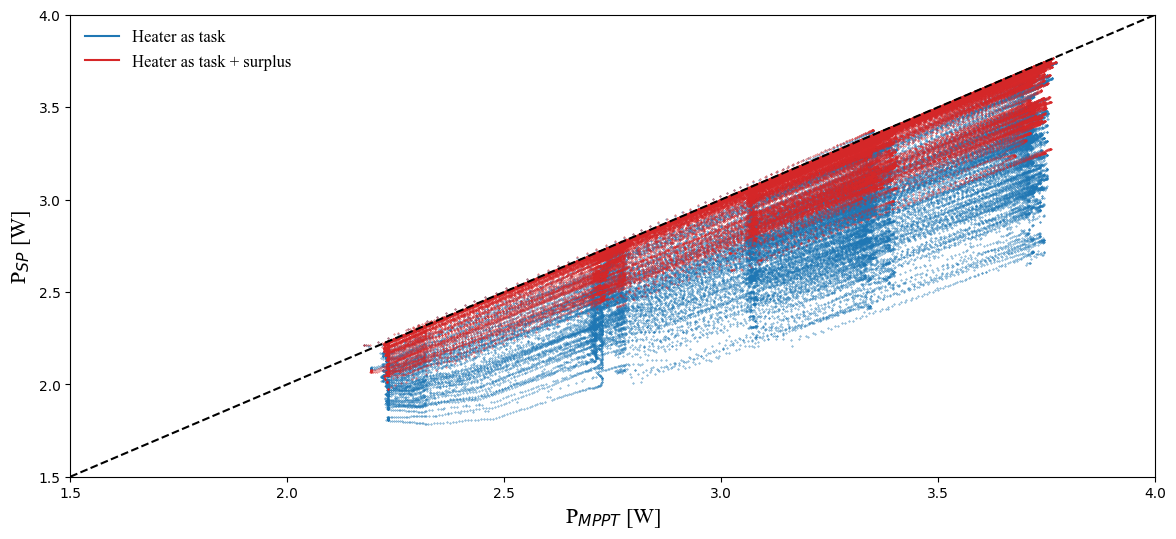

In [10]:
from math import sqrt
import matplotlib.font_manager as font_manager
case = 10
Pmppt = 0
PspTotal = 1
# create list of 70024 points from 0 to 4
x = [(i * 4 / timeLength) for i in range(timeLength)]

scenario = 0

# plt.figure(figsize=(5, 4))
plt.scatter(
    raw[scenario][case][Pmppt],
    raw[scenario][case][PspTotal],
    s=0.1,
    color=colors[scenario]
)
plt.plot([], [], color=colors[scenario], label="Heater as task")
plt.xlabel("P$_{MPPT}$ [W]", fontdict={"size": 16, "fontname": "Times New Roman"})
plt.ylabel("P$_{SP}$ [W]", fontdict={"size": 16, "fontname": "Times New Roman"})
plt.xlim(1.5, 4)
plt.ylim(1.5, 4)
plt.plot(x, x, "--", color="black")
# plt.title("PspTotal vs Pmppt")
# plt.show()

# calculate correlation coefficient between PspTotal and Pmppt
r, _ = stats.pearsonr(raw[scenario][case][Pmppt], raw[scenario][case][PspTotal])
print("r: " + str(r))
pmppt_eclipsent = []
psptotal_eclipsent = []
for t in range(timeLength):
    if raw[scenario][case][PspTotal][t] > 0 and raw[scenario][case][Pmppt][t] > 0:
        pmppt_eclipsent.append(raw[scenario][case][Pmppt][t])
        psptotal_eclipsent.append(raw[scenario][case][PspTotal][t])
print(len(pmppt_eclipsent))
r, _ = stats.pearsonr(pmppt_eclipsent, psptotal_eclipsent)
print("r: " + str(r))
ed = sqrt(sum([((raw[scenario][case][PspTotal][t] - raw[scenario][case][Pmppt][t]) ** 2) for t in range(timeLength)]))
print("ed: " + str(ed))

scenario = 3

# plt.figure(figsize=(5, 3))
plt.scatter(
    raw[scenario][case][Pmppt],
    raw[scenario][case][PspTotal],
    s=0.1,
    color=colors[scenario],
)
plt.plot([], [], color=colors[scenario], label="Heater as task + surplus")
# plt.xlabel("Pmppt [W]", fontdict={"size": 16, "fontname": "Times New Roman"})
# plt.ylabel("PspTotal [W]", fontdict={"size": 16, "fontname": "Times New Roman"})
# plt.xlim(1.5, 4)
# plt.ylim(1.5, 4)
# plt.plot(x, x, "r--")
# plt.title("PspTotal vs Pmppt")
font = font_manager.FontProperties(family='Times New Roman',
                                   style='normal',
                                   size=12)
plt.legend(frameon=False, prop=font)
# plt.show()
plt.savefig("plots/correlation.pdf",bbox_inches = 'tight')

# calculate correlation coefficient between PspTotal and Pmppt
r, _ = stats.pearsonr(raw[scenario][case][Pmppt], raw[scenario][case][PspTotal])
print("r: " + str(r))
pmppt_eclipsent = []
psptotal_eclipsent = []
for t in range(timeLength):
    if raw[scenario][case][PspTotal][t] > 0 and raw[scenario][case][Pmppt][t] > 0:
        pmppt_eclipsent.append(raw[scenario][case][Pmppt][t])
        psptotal_eclipsent.append(raw[scenario][case][PspTotal][t])
print(len(pmppt_eclipsent))
r, _ = stats.pearsonr(pmppt_eclipsent, psptotal_eclipsent)
print("r: " + str(r))
ed = sqrt(sum([((raw[scenario][case][PspTotal][t] - raw[scenario][case][Pmppt][t]) ** 2) for t in range(timeLength)]))
print("ed: " + str(ed))


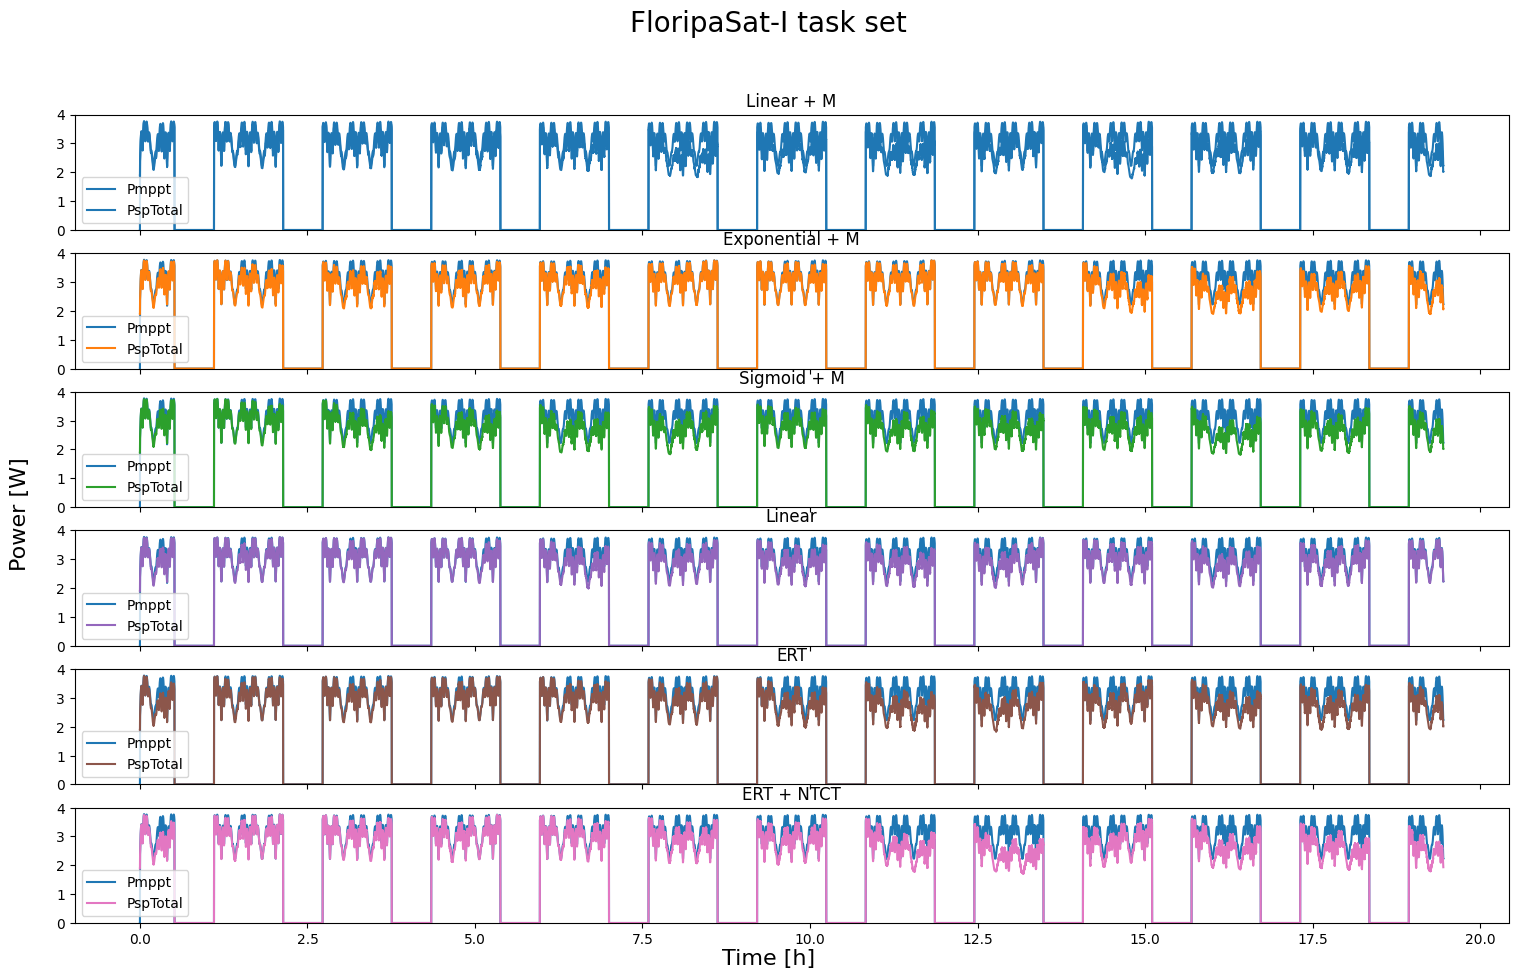

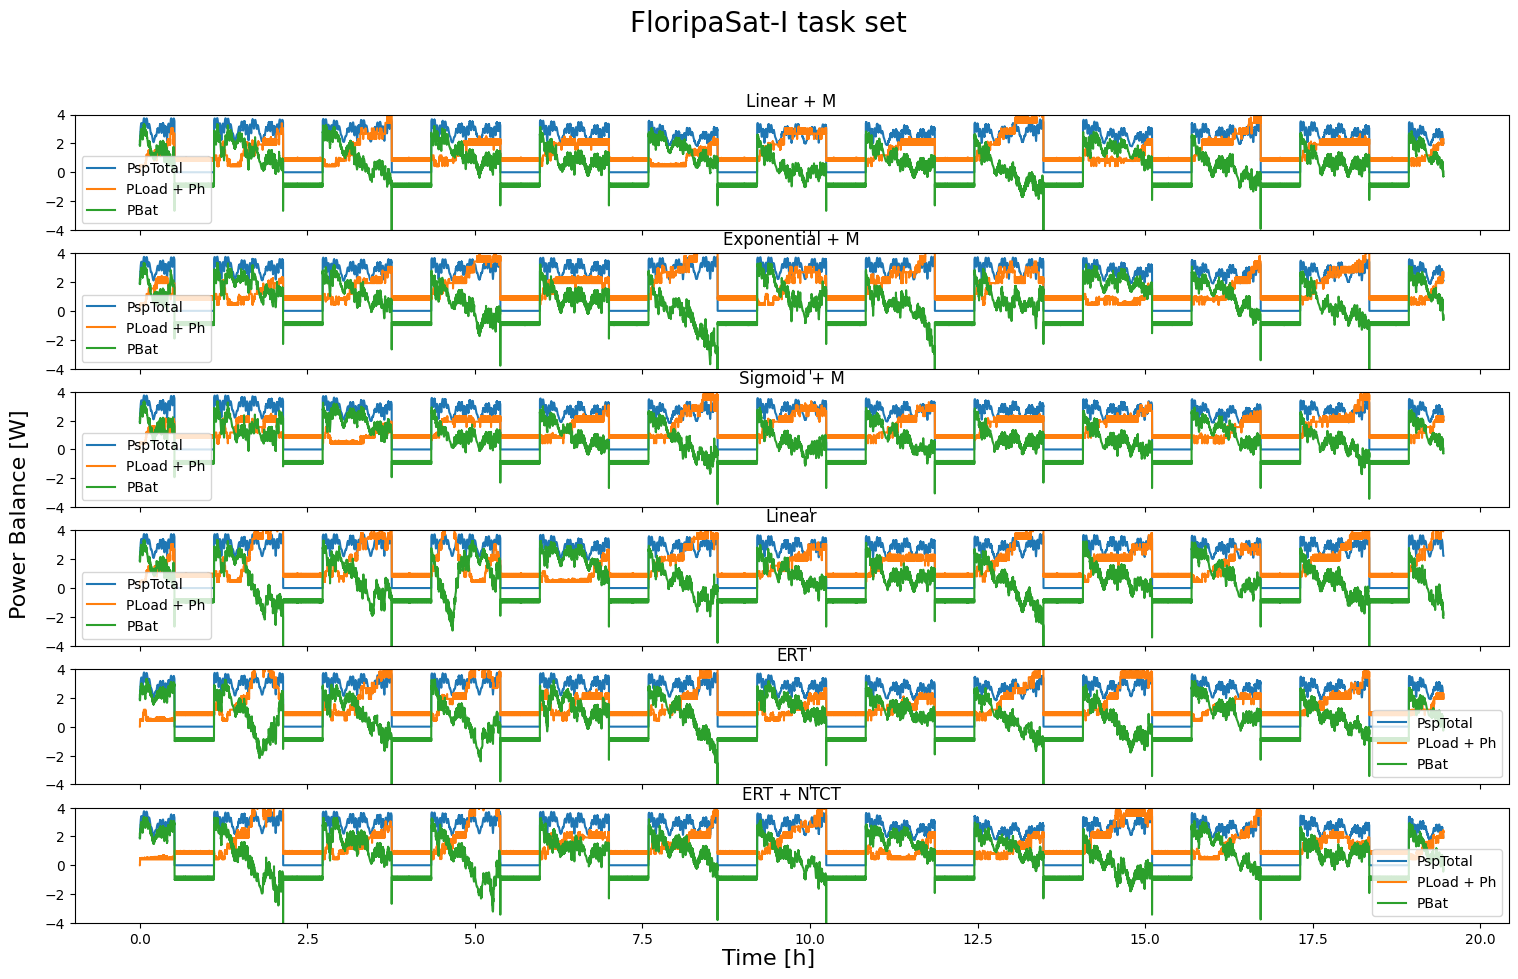

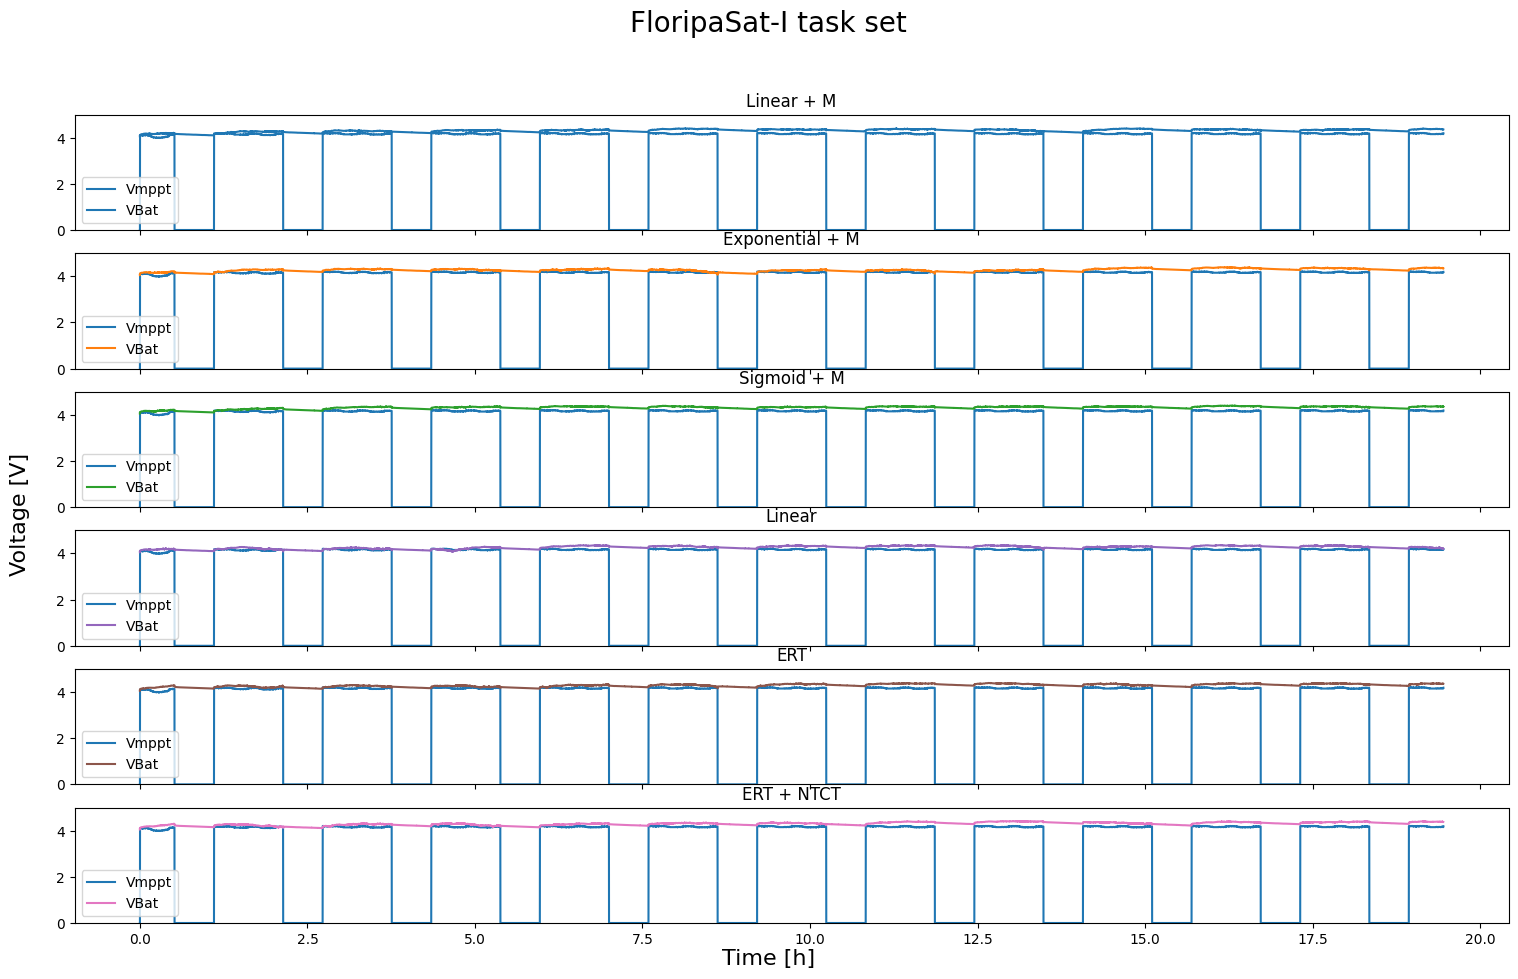

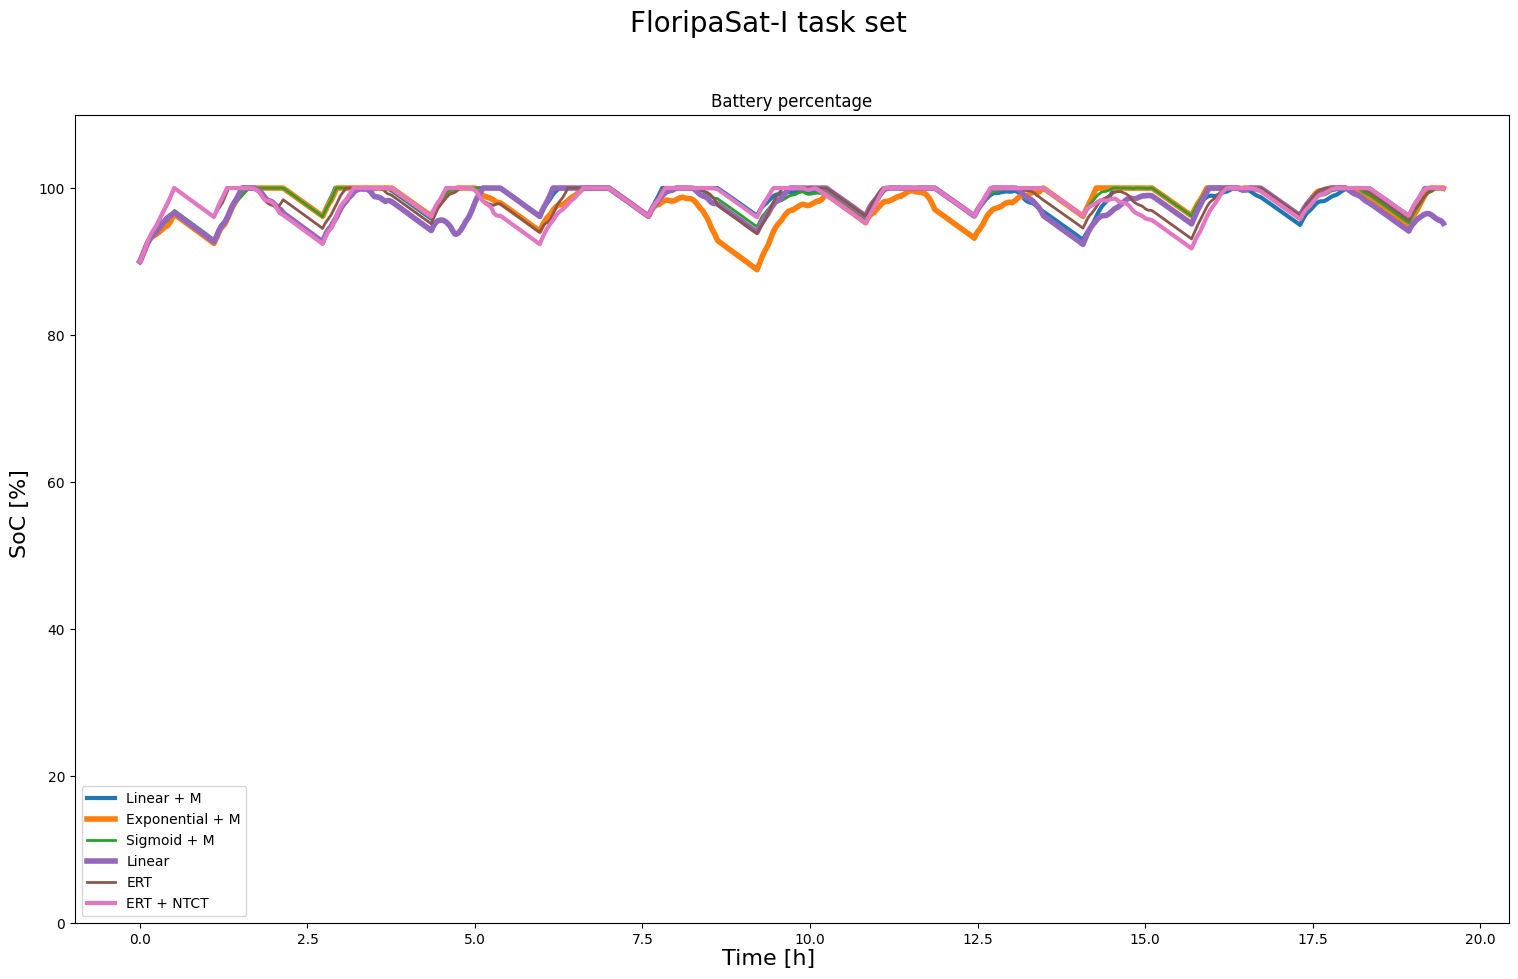

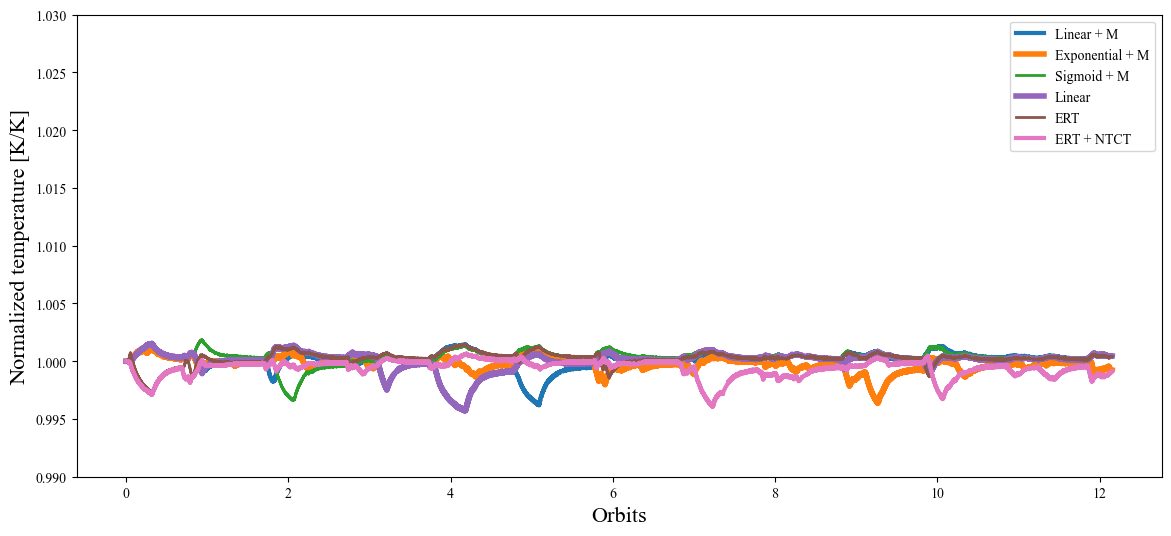

In [11]:
for case in casesToPlot:
    if case + 1 == 11:
        caseName = "FloripaSat-I task set"
    else:
        caseName = "Case " + str(case + 1)

    fig1, ax11 = plt.subplots(len(scenariosToPlot), 1, sharex=True)
    fig1.suptitle(caseName, fontsize=20)
    fig1.set_size_inches(18.5, 10.5)
    fig1.text(0.5, 0.07, "Time [h]", ha="center", fontsize=16)
    fig1.text(0.09, 0.5, "Power [W]", va="center", rotation="vertical", fontsize=16)

    fig5, ax51 = plt.subplots(len(scenariosToPlot), 1, sharex=True)
    fig5.suptitle(caseName, fontsize=20)
    fig5.set_size_inches(18.5, 10.5)
    fig5.text(0.5, 0.07, "Time [h]", ha="center", fontsize=16)
    fig5.text(
        0.09, 0.5, "Power Balance [W]", va="center", rotation="vertical", fontsize=16
    )

    fig2, ax21 = plt.subplots(len(scenariosToPlot), 1, sharex=True)
    fig2.suptitle(caseName, fontsize=20)
    fig2.set_size_inches(18.5, 10.5)
    fig2.text(0.5, 0.07, "Time [h]", ha="center", fontsize=16)
    fig2.text(0.09, 0.5, "Voltage [V]", va="center", rotation="vertical", fontsize=16)

    fig3, ax31 = plt.subplots()
    fig3.suptitle(caseName, fontsize=20)
    fig3.set_size_inches(18.5, 10.5)
    fig3.text(0.5, 0.07, "Time [h]", ha="center", fontsize=16)
    fig3.text(0.09, 0.5, "SoC [%]", va="center", rotation="vertical", fontsize=16)

    fig4, ax41 = plt.subplots()
    # fig4.suptitle(caseName, fontsize=20, fontdict={'fontname': 'Times New Roman'})
    fig4.set_size_inches(14, 6)
    ax41.set_xlabel("Orbits", fontdict={"size": 16, "fontname": "Times New Roman"})
    ax41.set_ylabel("Normalized temperature [K/K]", fontdict={"size": 16, "fontname": "Times New Roman"})
    # fig4.text(
    #     0.5,
    #     0.07,
    #     "Orbits",
    #     ha="center",
    #     fontsize=16,
    #     fontdict={"fontname": "Times New Roman"},
    # )
    # fig4.text(
    #     0.09,
    #     0.5,
    #     "Normalized temperature [K/K]",
    #     va="center",
    #     rotation="vertical",
    #     fontsize=16,
    #     fontdict={"fontname": "Times New Roman"},
    # )

    meanTBat = []
    for t in range(len(orbitVector)):
        sumTBat = 0
        for _, scenario in scenariosToPlot:
            sumTBat += raw[scenario][case][-1][t]
        meanTBat.append(sumTBat / len(scenariosToPlot))

    for i, scenario in scenariosToPlot:
        Pmppt = 0
        PspTotal = 1
        Vmppt = 2
        VBat = 3
        SoC = 4
        Dl_lost = 5
        tasks = range(6, len(raw[scenario][case]) - 4)
        PLoad = len(raw[scenario][case]) - 4
        Ph = len(raw[scenario][case]) - 3
        W = len(raw[scenario][case]) - 2
        TBat = len(raw[scenario][case]) - 1

        ax11[i].set_title(scnearioNames[scenario])
        ax11[i].plot(timeVector, raw[scenario][case][Pmppt], label="Pmppt")
        ax11[i].plot(
            timeVector,
            raw[scenario][case][PspTotal],
            label="PspTotal",
            color=colors[scenario],
        )
        ax11[i].set_ylim([0, 4])
        ax11[i].legend()

        PBat = [
            raw[scenario][case][PspTotal][t]
            - raw[scenario][case][PLoad][t]
            - raw[scenario][case][Ph][t]
            for t in range(len(timeVector))
        ]
        PLoadAndPh = [
            raw[scenario][case][PLoad][t] + raw[scenario][case][Ph][t]
            for t in range(len(timeVector))
        ]
        ax51[i].set_title(scnearioNames[scenario])
        ax51[i].plot(timeVector, raw[scenario][case][PspTotal], label="PspTotal")
        ax51[i].plot(timeVector, PLoadAndPh, label="PLoad + Ph")
        ax51[i].plot(timeVector, PBat, label="PBat")
        ax51[i].set_ylim([-4, 4])
        ax51[i].legend()

        ax21[i].set_title(scnearioNames[scenario])
        ax21[i].plot(timeVector, raw[scenario][case][Vmppt], label="Vmppt")
        ax21[i].plot(
            timeVector, raw[scenario][case][VBat], label="VBat", color=colors[scenario]
        )
        ax21[i].set_ylim([0, 5])
        ax21[i].legend()

        SoC_vector = [i * 100 for i in raw[scenario][case][SoC]]
        ax31.set_title("Battery percentage")
        ax31.plot(
            timeVector,
            SoC_vector,
            lineStyles[scenario],
            label=scnearioNames[scenario],
            color=colors[scenario],
            linewidth=(((scenario + 1) % 3) + 2),
        )
        ax31.set_ylim([0, 110])
        ax31.legend()

        normalizedTBat = [
            raw[scenario][case][TBat][t] / meanTBat[t] for t in range(len(orbitVector))
        ]

        # ax41.set_title("Battery temperature", fontdict={'fontname': 'Times New Roman'})
        ax41.plot(
            orbitVector,
            normalizedTBat,
            lineStyles[scenario],
            label=scnearioNames[scenario],
            color=colors[scenario],
            linewidth=(((scenario + 1) % 3) + 2),
        )
        # change label font to Times New Roman
        for label in ax41.xaxis.get_ticklabels():
            label.set_fontname("Times New Roman")
        for label in ax41.yaxis.get_ticklabels():
            label.set_fontname("Times New Roman")
        ax41.legend()
        # change legend font to Times New Roman
        for label in ax41.legend().get_texts():
            label.set_fontname("Times New Roman")
        ax41.set_ylim([0.99, 1.03])
        # print(min(raw[scenario][case][TBat]))
        # avgTBat = sum(raw[scenario][case][TBat]) / len(raw[scenario][case][TBat])
        # print(avgTBat)
    fig4.savefig("plots/bat_temp.pdf",bbox_inches = 'tight')


In [ ]:
for case in casesToPlot:
    for i, scenario in scenariosToPlot:
        plt.figure(figsize=(16, 9))
        tasks = range(6, len(raw[scenario][case]) - 4)
        for task in tasks:
            y = task - 6
            plt.subplot(len(tasks), 1, y + 1)
            plt.plot(timeVector, raw[scenario][case][tasks[y]], "-", linewidth=0.5)
        # Add labels
        plt.subplot(len(tasks), 1, 1)
        plt.title(
            "Case "
            + str(case + 1)
            + " Scenario "
            + str(scenario + 1)
            + ":Tasks On-Off Status"
        )
        for task in tasks:
            y = task - 6
            plt.subplot(len(tasks), 1, y + 1)
            plt.ylabel("Task" + str(y + 1))
            plt.ylim(-0.1, 1.1)
        plt.xlabel("Time [h]")
        # increase space between subplots
        plt.subplots_adjust(hspace=1.0)


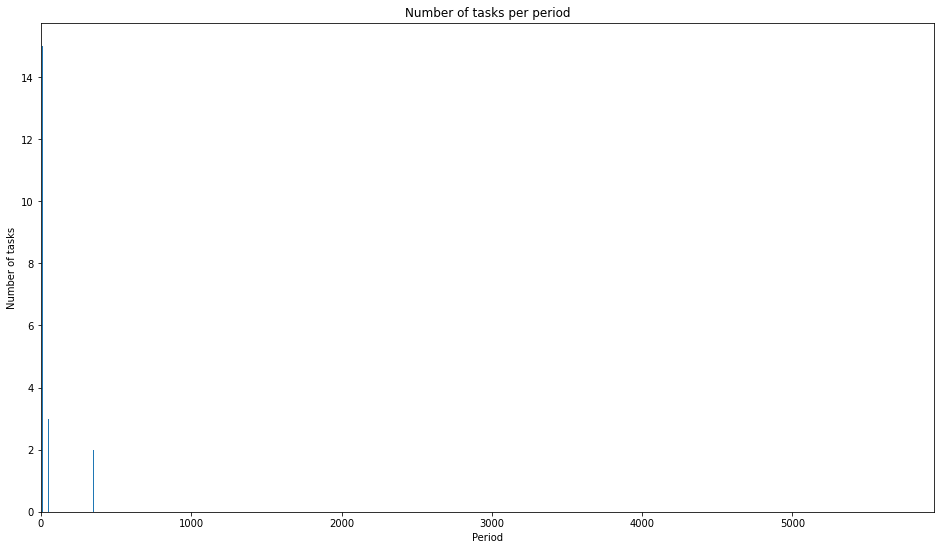

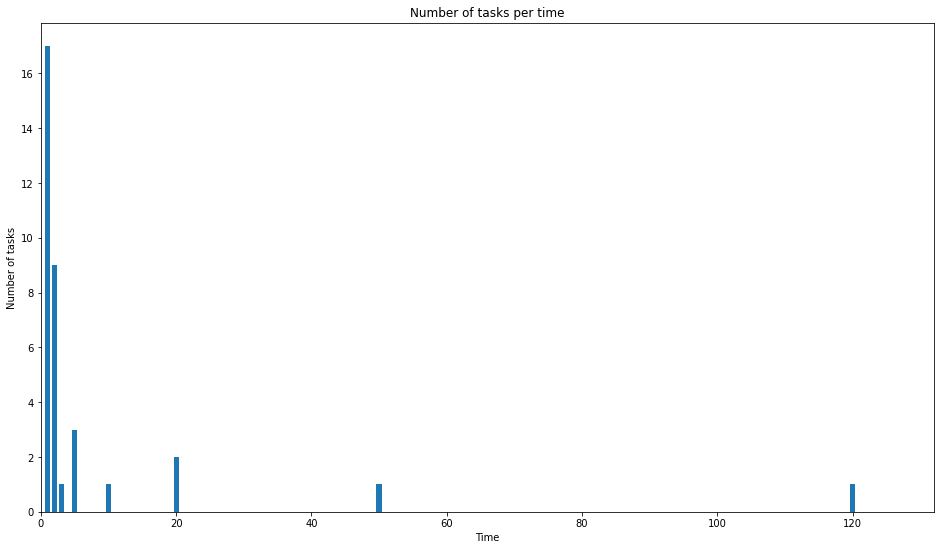

In [19]:
tasks_periods = []
tasks_weights = []
tasks_times = []
number_of_tasks = 0
# import tasks from csv
with open("tasks/tasks" + str(11) + ".csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    # skip first row
    next(reader)
    for row in reader:
        tasks_periods.append(int(row[0]))
        tasks_weights.append(int(row[1]))
        tasks_times.append(int(row[2]))
        number_of_tasks += 1

max_period = max(tasks_periods)
max_weight = max(tasks_weights)
max_time = max(tasks_times)

number_of_tasks_per_period = [0 for _ in range(1, max_period + 1)]
number_of_tasks_per_weight = [0 for _ in range(1, max_weight + 1)]
number_of_tasks_per_time = [0 for _ in range(1, max_time + 1)]

for i in range(number_of_tasks):
    number_of_tasks_per_period[tasks_periods[i] - 1] += 1
    number_of_tasks_per_weight[tasks_weights[i] - 1] += 1
    number_of_tasks_per_time[tasks_times[i] - 1] += 1

# plot number of tasks per period
plt.figure(figsize=(16, 9))
plt.subplot(1, 1, 1)
plt.bar(range(1, max_period + 1), number_of_tasks_per_period)
plt.xlabel("Period")
plt.ylabel("Number of tasks")
plt.title("Number of tasks per period")
plt.xlim([0, max_period * 1.1])
plt.show()

# plot number of tasks per time
plt.figure(figsize=(16, 9))
plt.subplot(1, 1, 1)
plt.bar(range(1, max_time + 1), number_of_tasks_per_time)
plt.xlabel("Time")
plt.ylabel("Number of tasks")
plt.title("Number of tasks per time")
plt.xlim([0, max_time * 1.1])
plt.show()
